In [1]:
import pandas as pd
import matplotlib
import time
import matplotlib.pyplot as plt
import numpy as np
import plotnine as p9
import seaborn as sns
import cartopy.crs as ccrs
import cartopy.feature as cfeatur
%matplotlib inline
import os

In [2]:
df=pd.read_csv("folder/各点多年平均_有经纬LAI.csv")

/home/fetching/anaconda3/envs/myenv/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


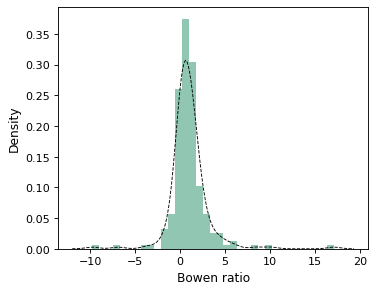

In [3]:
#画频率分布图

b=df['b']

plt.figure(figsize=(5,4), dpi= 80)
sns.distplot(df.b,  
            # 设置数据频率分布颜色
            hist=True,
            bins=35,
            kde=True,
            kde_kws={"color": "k", "lw": 0.8, "label": "KDE",'linestyle':'--'},
            hist_kws={"histtype": "barstacked", "linewidth": 2,"alpha":0.45, "color": "#098154"})

plt.xlabel("Bowen ratio",fontsize=11)
plt.ylabel("Density",fontsize=11)
plt.savefig("folder/图/2.Bowen比正态分布.jpg",dpi=300, bbox_inches='tight' )
plt.show()




In [4]:
#画植被Bowen ratio南北差异图 

y=df.groupby('IGBP').b.mean()
y=pd.DataFrame(y)
sem=df.groupby('IGBP').b.sem()
sem=pd.DataFrame(sem)
y.insert(1,'sem_all',sem.b)

#计算北半球不同植被的b值和标准误
y_N=df[df['latitude']>0].groupby('IGBP').b.mean()
y_N=pd.DataFrame(y_N)
y.insert(1,'b_N',y_N.b)

sem_N=df[df['latitude']>0].groupby('IGBP').b.sem()
sem_N=pd.DataFrame(sem_N)
y.insert(1,'sem_N',sem_N.b)

#计算南半球不同植被的b值和标准误
y_S=df[df['latitude']<0].groupby('IGBP').b.mean()
y_S=pd.DataFrame(y_S)
y.insert(1,'b_S',y_S.b)

sem_S=df[df['latitude']<0].groupby('IGBP').b.sem()
sem_S=pd.DataFrame(sem_S)
y.insert(1,'sem_S',sem_S.b)

#加入类型
type=['CRO','CSH','DBF','DNF','EBF','ENF','GRA','MF','OSH','SAV','WET','WSA']
y.insert(3,'type',type)

In [5]:
y

,b,sem_S,b_S,type,sem_N,b_N,sem_all
IGBP,,,,,,,
CRO,-0.110258,NaN,NaN,CRO,0.281102,-0.110258,0.281102
CSH,0.838947,NaN,NaN,CSH,0.421672,0.838947,0.421672
DBF,1.092798,0.919094,0.987297,DBF,0.230671,1.101589,0.218685
DNF,1.879606,NaN,NaN,DNF,NaN,1.879606,NaN
EBF,0.495295,0.176424,0.489010,EBF,0.128199,0.502477,0.107658
ENF,0.870921,NaN,-0.235940,ENF,0.131666,0.896077,0.131142
GRA,1.470118,2.432607,5.267329,GRA,0.296727,0.779716,0.501514
MF,0.784071,NaN,2.084899,MF,0.201597,0.621468,0.240935
OSH,2.731307,NaN,NaN,OSH,0.811652,2.731307,0.811652


In [6]:
#调整顺序
order=[12,6,4,3,2,1,10,5,7,9,11,8]
y.insert(3,'order',order)
y.sort_values(by='order',ascending=True, inplace=True) 

In [7]:
y

,b,sem_S,b_S,order,type,sem_N,b_N,sem_all
IGBP,,,,,,,,
ENF,0.870921,NaN,-0.235940,1,ENF,0.131666,0.896077,0.131142
EBF,0.495295,0.176424,0.489010,2,EBF,0.128199,0.502477,0.107658
DNF,1.879606,NaN,NaN,3,DNF,NaN,1.879606,NaN
DBF,1.092798,0.919094,0.987297,4,DBF,0.230671,1.101589,0.218685
MF,0.784071,NaN,2.084899,5,MF,0.201597,0.621468,0.240935
CSH,0.838947,NaN,NaN,6,CSH,0.421672,0.838947,0.421672
OSH,2.731307,NaN,NaN,7,OSH,0.811652,2.731307,0.811652
WSA,2.095265,0.454594,1.598898,8,WSA,0.522847,3.087997,0.446585
SAV,2.928284,1.208408,3.071284,9,SAV,1.146010,2.427784,0.947228


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


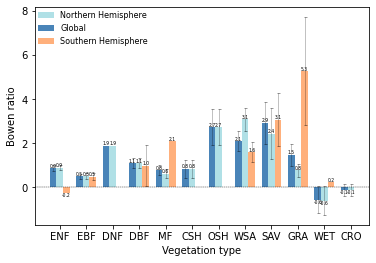

In [8]:
#绘图
fig, axes = plt.subplots(figsize=(6, 4))
axes.grid(alpha=0,axis="y")
width = 0.25
labels = ['ENF','EBF','DNF','DBF','MF','CSH','OSH','WSA','SAV','GRA','WET','CRO']
plt.xlabel("Vegetation type")
plt.ylabel("Bowen ratio")
plt.tick_params(labelsize=10)

x =list(range(len(labels)))
#plt.plot([0,12], [0,0], linestyle='--', color='k',  linewidth=1)
plt.axhline(0,linestyle='--', color='k',  linewidth=0.4)       


error_params=dict(elinewidth=0.6,ecolor='black',capsize=1.5,alpha=0.4)
plt.bar(x, y.b_N, width=width, label='Northern Hemisphere',yerr=y.sem_N,error_kw=error_params,fc='powderblue',tick_label=labels,edgecolor= 'black',lw=0)
for a,b in zip(x,y.b_N):
    if b < 0:
        plt.text(a, b,'%.1f'%b, ha = 'center',va = 'top',fontsize=4.5)
    else:
        plt.text(a, b,'%.1f'%b, ha = 'center',va = 'bottom',fontsize=4.5)

for i in range(12):
    x[i] = x[i] - width 
plt.bar(x, y.b, width=width, label='Global',yerr=y.sem_all,error_kw=error_params,fc='#4984b8',edgecolor= 'black',lw=0)
for a,b in zip(x,y.b):
    if b < 0:
        plt.text(a, b,'%.1f'%b, ha = 'center',va = 'top',fontsize=4.5)
    else:
        plt.text(a, b,'%.1f'%b, ha = 'center',va = 'bottom',fontsize=4.5)

for i in range(12):
    x[i] = x[i] + width *2
plt.bar(x, y.b_S, width=width, label='Southern Hemisphere',yerr=y.sem_S,error_kw=error_params, fc='#ffb07c',edgecolor= 'black',lw=0)
for a,b in zip(x,y.b_S):
    if b < 0:
        plt.text(a, b,'%.1f'%b, ha = 'center',va = 'top',fontsize=4.5)
    else:
        plt.text(a, b,'%.1f'%b, ha = 'center',va = 'bottom',fontsize=4.5)


plt.legend(fontsize = 8,loc=2,frameon=False,borderaxespad = 0)
plt.savefig("folder/图/2波文比柱状图sem.jpg",bbox_inches='tight',dpi=200 )
plt.show()